<a href="https://colab.research.google.com/github/Tekleab15/Quantum_Computing_Tasks/blob/main/Task3_Opposite_Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3: Opposite-Measurement Entanglement**

Goal: Create a circuit where two qubits are entangled such that measuring one always gives the opposite result of the other (e.g., if Qubit 0 is 0, Qubit 1 must be 1, and vice versa).

Expected Output

After 1000 shots, the histogram should show only 01 and 10 (never 00 or 11).

The idea is to create an anti-correlated (or opposite-measurement) Bell state.
Steps to tackle it
1. First, create the usual Bell state

        ∣00⟩+∣11⟩/sqrt(2)
    by applying a Hadamard gate on Qubit 0 and then a CNOT gate from Qubit 0 (control) to Qubit 1 (target).
2. Then apply an X (bit-flip) gate to Qubit 1. This operation transforms the state as follows:

    When the state was ∣00⟩, the X gate on qubit 1 turns it into  ∣01⟩.
    When the state was ∣11⟩ it becomes ∣10⟩.
    Thus, after the X gate on qubit 1 you obtain
        ∣01⟩+∣10⟩/sqrt(2),

In [9]:
# Installing the required modules and libraries
# !pip install qiskit qiskit_aer

In [11]:
# Installing required libraries
import qiskit, qiskit_aer
from qiskit_aer.primitives import SamplerV2
from qiskit.visualization import plot_histogram

In [8]:
# We use 2 classical bits to explicitly measure both qubits.
qc = qiskit.QuantumCircuit(2, 2)

# Step 1: Create the Bell state (|00> + |11>)/sqrt(2)
# Put qubit 0 in superposition
qc.h(0)
# Entangle qubit 1 with qubit 0 => state becomes (|00> + |11>)/sqrt(2)
qc.cx(0,1)

# Step 2: Apply an X gate to Qubit 1 to flip the state.
qc.x(1)

# Step 3: Measure both qubits.
qc.measure_all()
print(qc.draw())

        ┌───┐           ░ ┌─┐   
   q_0: ┤ H ├──■────────░─┤M├───
        └───┘┌─┴─┐┌───┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├┤ X ├─░──╫─┤M├
             └───┘└───┘ ░  ║ └╥┘
   c: 2/═══════════════════╬══╬═
                           ║  ║ 
meas: 2/═══════════════════╩══╩═
                           0  1 


**Expected Outcome:** The histogram (after 1000 shots) should show counts for only 01 and 10 (ideally in a roughly 50/50 split if there is no noise), with 0 counts for both 00 and 11.

Histogram representation Opposite-Measurement Entanglement.
Counts(ideal): {'01': 492, '10': 508}


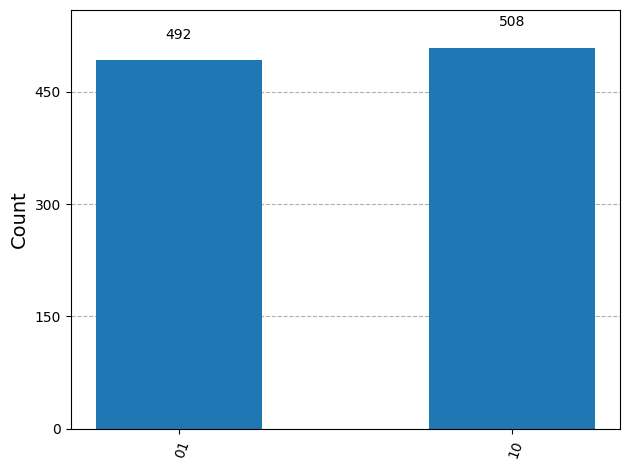

In [14]:
# Construct an ideal simulator with SamplerV2
sampler = SamplerV2()
job = sampler.run([qc], shots=1000)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

print("Histogram representation Opposite-Measurement Entanglement.")
print('Counts(ideal):', counts_ideal)

# Visualize the results with histogram representation
plot_histogram(counts_ideal)

This histogram confirms the entangled state was successfully generated, as only the anti-correlated outcomes '01' and '10' appear.